In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [ ]:
# The digits dataset
digits = datasets.load_digits()

In [ ]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
def plot_multi(i):
    '''Plots 16 digits, starting with digit i'''
    nplots = 16
    fig = plt.figure(figsize=(8,8))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()

In [ ]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [ ]:
# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
all_result = np.array([[],[],[]], dtype=float)
Solver = ["lbfgs","sgd","adam"]
for L_size in range(5,100,5):
  sol_result = np.ndarray(shape=(3,1) ,dtype=float)
  for a in range(0,3):
    
    mlp2 = MLPClassifier(hidden_layer_sizes=(L_size), 
                    activation='logistic', 
                    max_iter = 1000,
                    solver=Solver[a],
                    learning_rate='constant',
                    learning_rate_init=0.01, 
                    verbose=False)
    classifier2 = mlp2.fit(X_train, y_train)
    predicted2 = mlp2.predict(X_test)
    sol_result[a][0] = accuracy_score(y_test, predicted2)
  all_result = np.append(all_result, sol_result,  axis = 1)




/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
print(all_result)

[[0.71851852 0.68333333 0.87777778 0.88703704 0.86481481 0.86296296
  0.8962963  0.89814815 0.87777778 0.90740741 0.89444444 0.88703704
  0.88888889 0.88703704 0.89259259 0.89259259 0.90925926 0.90925926
  0.89814815]
 [0.7962963  0.89814815 0.9037037  0.91296296 0.91481481 0.93518519
  0.92777778 0.93333333 0.92962963 0.93518519 0.93703704 0.94074074
  0.93703704 0.93888889 0.93333333 0.93333333 0.92777778 0.93703704
  0.93148148]
 [0.87037037 0.88148148 0.89814815 0.90740741 0.92037037 0.91851852
  0.92777778 0.92962963 0.91666667 0.93333333 0.93888889 0.93518519
  0.93518519 0.93888889 0.93333333 0.93333333 0.93148148 0.93888889
  0.93703704]]


<function matplotlib.pyplot.show>

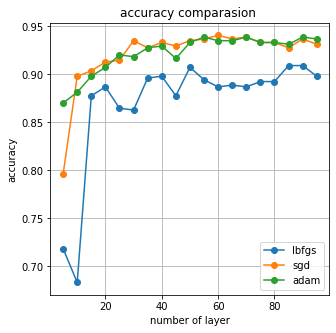

In [ ]:
plt.plot(range(5, 100, 5), all_result[0], '-o', label = "lbfgs")
plt.plot(range(5, 100, 5), all_result[1], '-o', label = "sgd")
plt.plot(range(5, 100, 5), all_result[2], '-o', label = "adam")
plt.title('accuracy comparasion ')
plt.ylabel('accuracy')
plt.xlabel('number of layer')
plt.grid()
plt.rcParams["figure.figsize"] = (10,5)
plt.legend()
plt.show

In [ ]:

# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
# Specify an MLP model
classifier = MLPClassifier(hidden_layer_sizes=(30), 
                    activation='logistic', 
                    max_iter = 1000,
                    solver='sgd',
                    learning_rate='constant',
                    learning_rate_init=0.02, 
                    verbose=True)

In [ ]:
# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

In [ ]:
# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

In [ ]:
print (len(predicted))

540


In [ ]:

accuracy_score(y_test, predicted)
# We managed to get a level of accuracy of 85.07%

0.9407407407407408

Confusion matrix:
[[50  0  0  0  1  0  2  0  0  0]
 [ 0 46  0  2  1  0  0  0  1  3]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0  1 43  0  1  0  1  7  0]
 [ 0  1  0  0 54  0  0  0  0  2]
 [ 0  0  0  0  1 53  2  0  0  0]
 [ 0  3  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  2  0  0 51  1  0]
 [ 0  2  0  0  0  2  0  0 48  0]
 [ 1  0  0  1  0  2  0  0  0 51]]


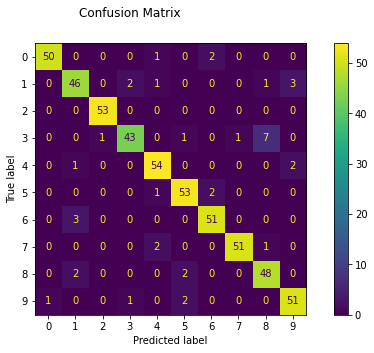

In [ ]:
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

In [ ]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))

Classification report for classifier MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=20, learning_rate='constant',
              learning_rate_init=0.02, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False):
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        53
           1       0.88      0.87      0.88        53
           2       0.98      1.00      0.99        53
           3       0.93      0.81      0.87        53
           4       0.92      0.95      0.93        57
           5       0.91      0.95      0.93        56
           6       0.93      0.94      0.94        54
     